# **ADS 542 FINAL PROJECT**

by Gamze G. Kasman

## **Table of Contents**

>[1. Introduction](#scrollTo=nlPTTXdTZy0a)

>>[Features](#scrollTo=LeyFjXkE4elf)

>[2. Exploratory Data Analysis](#scrollTo=0vCqCKsXbGXd)

>>>[Univariate Analysis of Categorical Features](#scrollTo=V1vMmEYxAl4i)

>>>>[Observations :](#scrollTo=sS489o3rFCVz)

>>>>[Imputing unknown values of categorical columns¶](#scrollTo=eo6keIWiFcWE)

>>>[Univariate Analysis of Continuous Features](#scrollTo=w2IPf07pHdXD)

>>>[Observation :](#scrollTo=lVysgxozLuND)

>>>[Bivariate Analysis of Categorical Features](#scrollTo=pkhmQ9iBNx0v)

>>>[Observations:](#scrollTo=Ly8vIPijO13q)

>>>[Treating Outliers](#scrollTo=9eY8FtcOIfxZ)

>>>[Correlation Heatmap](#scrollTo=MqWF6a9jNIZG)

>[3. Preprocessing](#scrollTo=ycdfxkrDQq_f)

>>>[Encoding of the Categorical Variables](#scrollTo=IDVdfioLOvlS)

>>>[Feature Scaling](#scrollTo=s5qAYyAKYKlZ)

>>>[SMOTE (Synthetic Minority Over-sampling Technique)](#scrollTo=RMRCShFd-uY9)

>[4. Model Selection](#scrollTo=0CagzXAFBNK0)

>>>[Logistic Regression](#scrollTo=ODgy4BK6Bd38)

>>>[K Nearest Neighbors Classifier](#scrollTo=w-4NBA1pBOrk)

>>>[Support Vector Machine](#scrollTo=fbWfuPjTEAdQ)

>>>[Decision Tree](#scrollTo=IIPlQIriEZM6)

>>>[Random Forest Classifier](#scrollTo=CRBcNy_uEk-b)

>>>[Naive Bayes](#scrollTo=vCPdpNhBEvXu)

>>>[XG Boost](#scrollTo=XvbB79BZFJ5h)

>>>[Gradient Boosting](#scrollTo=wc3mHY9yFUiW)

>>[Accuracy](#scrollTo=OtS-F1PRG8Fl)

>>>[AUC Curves](#scrollTo=x40wpsCXJ9KR)

>>[Other Metrics to Consider](#scrollTo=DFJVX_MLKDuH)

>>[Hyperparameter Tuning](#scrollTo=y2dwLKyba1G7)

>>[Model Optimization](#scrollTo=OiyAiXMHg15A)

>>[Model Evaluation](#scrollTo=6C0hKNQVgyP8)

>[Deployment](#scrollTo=WPNZzgfig5jT)



# **1. Introduction**

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

## **Features**

We have a dataset of 21 columns and 4119 entries:

1 - age (numeric)

2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)

4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")

5 - default: has credit in default? (categorical: "no","yes","unknown")

6 - housing: has housing loan? (categorical: "no","yes","unknown")

7 - loan: has personal loan? (categorical: "no","yes","unknown")

8 - contact: contact communication type (categorical: "cellular","telephone")

9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")

16 - emp.var.rate: Employment variation is the variation of how many people are being hired or fired due to the shifts in the conditions of the economy. - quarterly indicator (numeric)

17 - cons.price.idx: The Consumer Price Index (CPI) is a measure that examines the weighted average of prices of a basket of consumer goods and services, such as transportation, food, and medical care. It is calculated by taking price changes for each item in the predetermined basket of goods and averaging them. - monthly indicator (numeric) 18 - cons.conf.idx: Consumer confidence index (CCI) This consumer confidence indicator provides an indication of future developments of households' consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. - monthly indicator (numeric)

19 - euribor3m: The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

21- y: target variable, has the client subscribed a term deposit? ('yes','no')

In [ ]:
import xgboost
#Loading necessary libraries
from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.pipeline import Pipeline
!pip install streamlit
import streamlit as st
import joblib
import pickle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **2. Exploratory Data Analysis**

In [ ]:
#Loading the dataset
df=pd.read_csv("/content/bank-additional.csv", sep=";")

In [ ]:
#Shape of the data
print("Shape of the data is: ", df.shape)

Shape of the data is:  (4119, 21)


In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#Drop the unnecessary features (columns)
columns_to_drop = ['emp.var.rate', 'cons.price.idx','cons.conf.idx', 'euribor3m', 'nr.employed']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.dtypes

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

In [ ]:
#Descriptive Stats
df.describe()

,age,duration,campaign,pdays,previous
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337
std,10.313362,254.703736,2.568159,191.922786,0.541788
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4119 non-null   int64 
 1   job          4119 non-null   object
 2   marital      4119 non-null   object
 3   education    4119 non-null   object
 4   default      4119 non-null   object
 5   housing      4119 non-null   object
 6   loan         4119 non-null   object
 7   contact      4119 non-null   object
 8   month        4119 non-null   object
 9   day_of_week  4119 non-null   object
 10  duration     4119 non-null   int64 
 11  campaign     4119 non-null   int64 
 12  pdays        4119 non-null   int64 
 13  previous     4119 non-null   int64 
 14  poutcome     4119 non-null   object
 15  y            4119 non-null   object
dtypes: int64(5), object(11)
memory usage: 515.0+ KB


In [ ]:
#No missing values
df.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### **Univariate Analysis of Categorical Features**

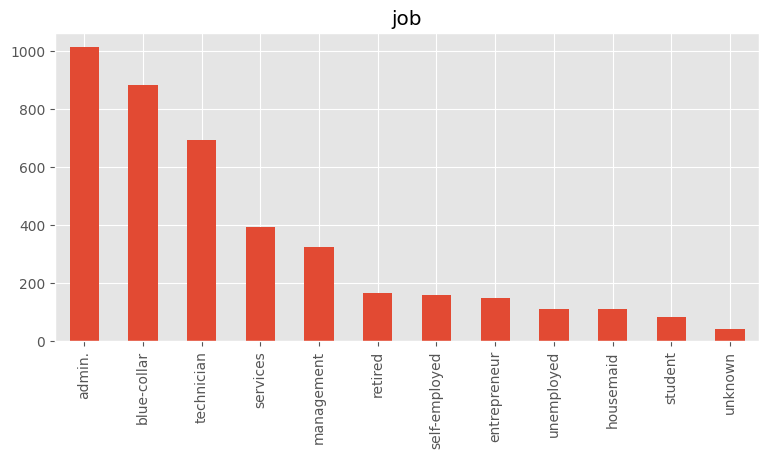

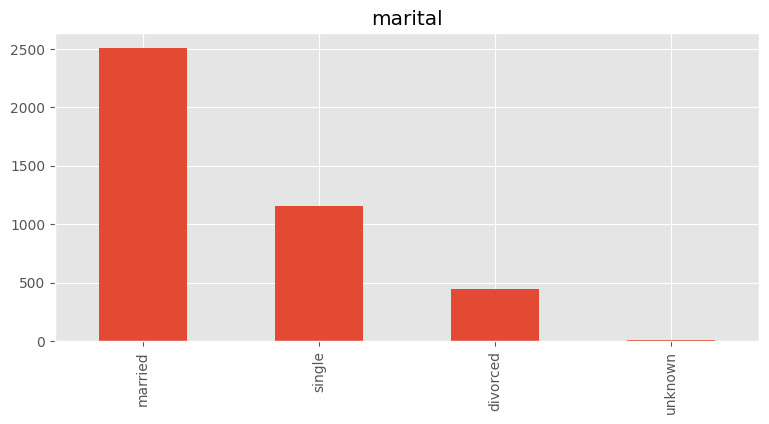

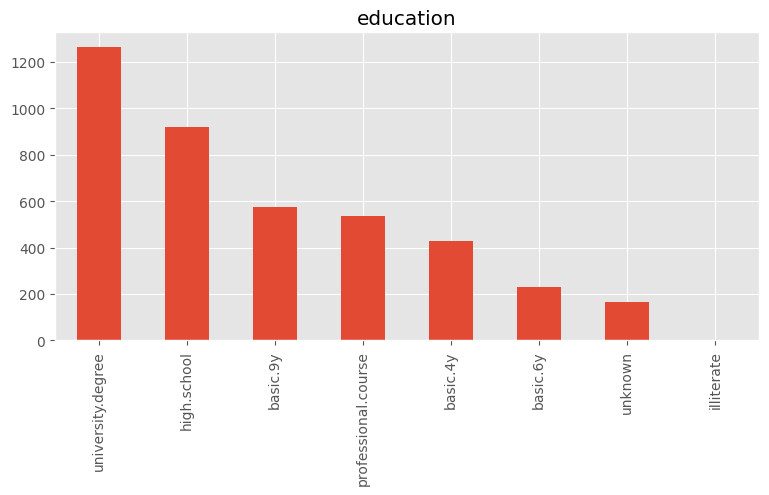

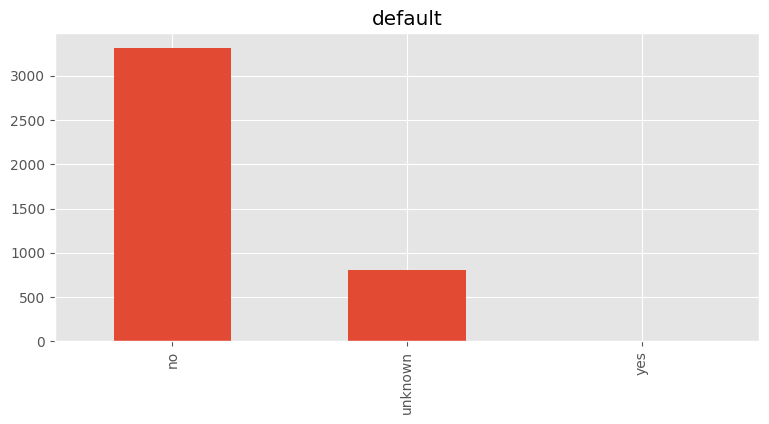

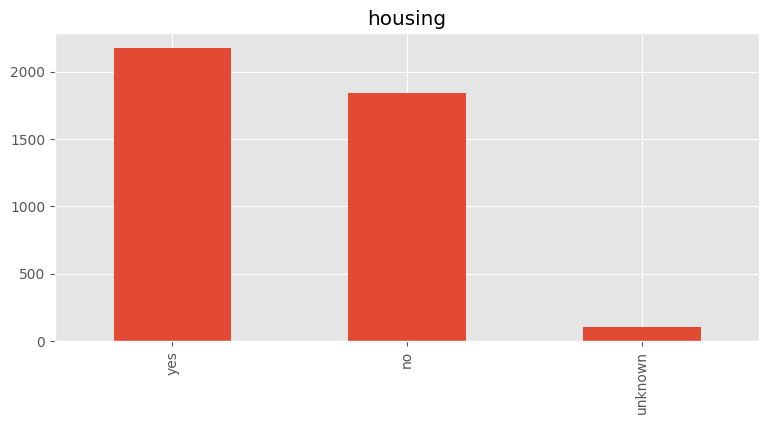

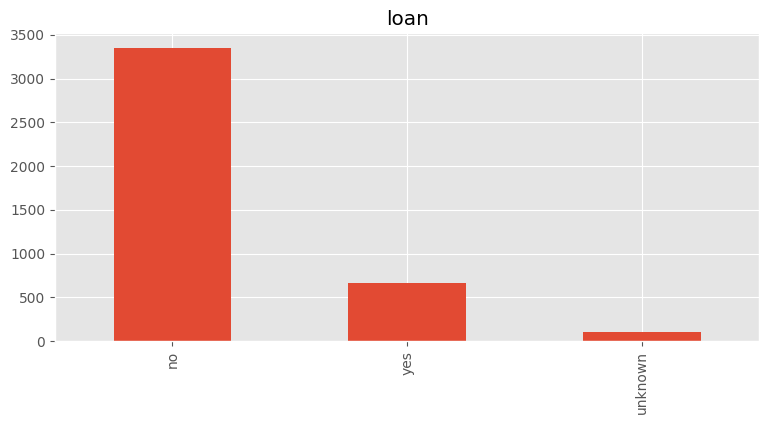

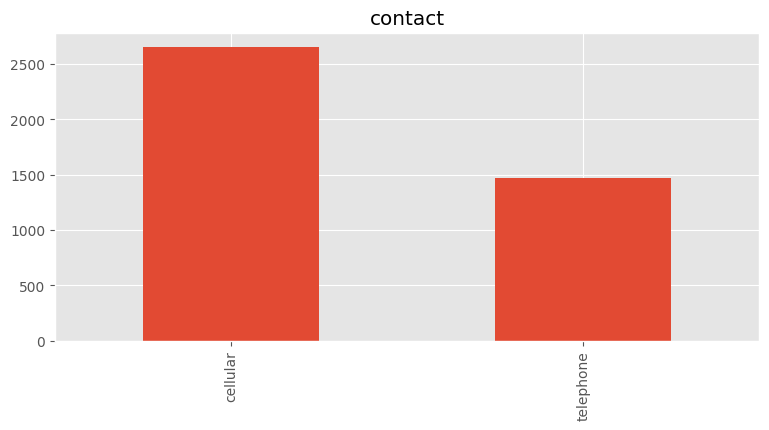

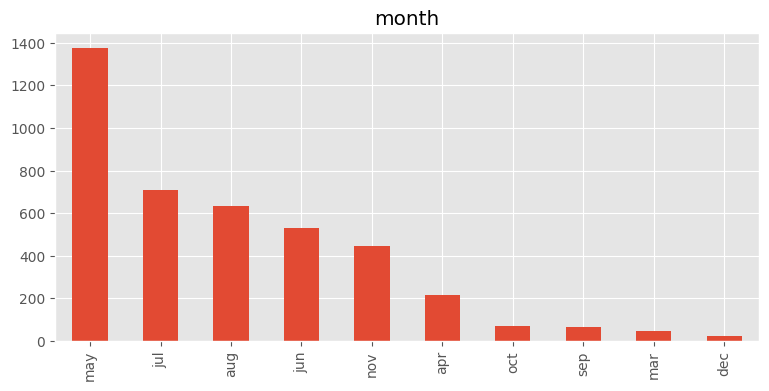

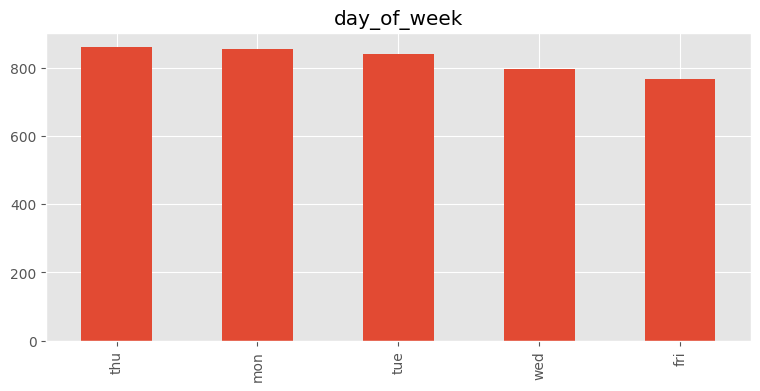

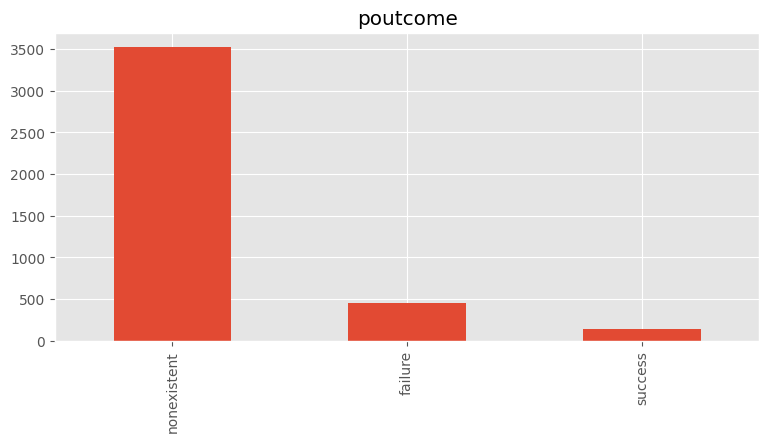

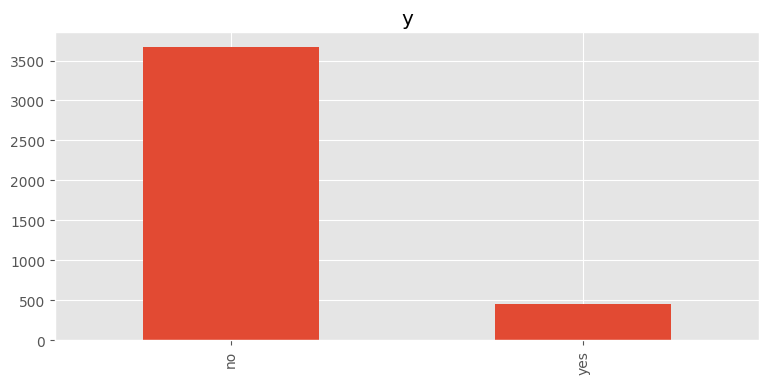

In [ ]:
#Selecting categorical columns
categorical_col=df.select_dtypes(include=['object']).columns
plt.style.use("ggplot")
#Plotting a bar chart for each of the categorical variable
for column in categorical_col:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  df[column].value_counts().plot(kind="bar")
  plt.title(column)

#### **Observations :**

From the above visuals, we can make the following observations:

1. The top three professions that our customers belong to are - administration, blue-collar jobs and technicians.

2. A huge number of the customers are married.

3. Majority of the customers do not have a credit in default

4. Many of the past customers have applied for a housing loan but very few have applied for personal loans.

5. Cell-phones seem to be the most favoured method of reaching out to customers.
Many customers have been contacted in the month of May.

6. The plot for the target variable shows **heavy imbalance** in the target variable.

7. The missing values in some columns have been represented as **unknown**. Here unknown represents missing data. In the next task, we will treat these values.

#### **Imputing unknown values of categorical columns¶**


In [ ]:
# Impute mising values of categorical data with mode
for column in categorical_col:
  mode=df[column].mode()[0]
  df[column]=df[column].replace("unknown",mode)

### **Univariate Analysis of Continuous Features**

In [ ]:
#Selecting categorical columns
numeric_col=df.select_dtypes(include=np.number).columns


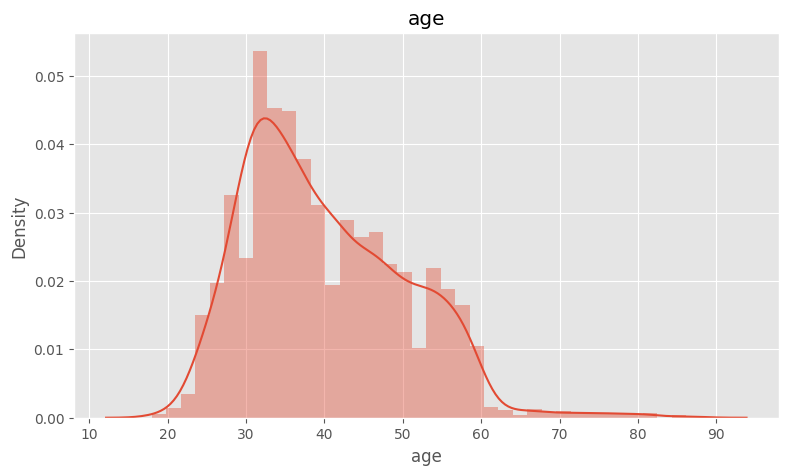

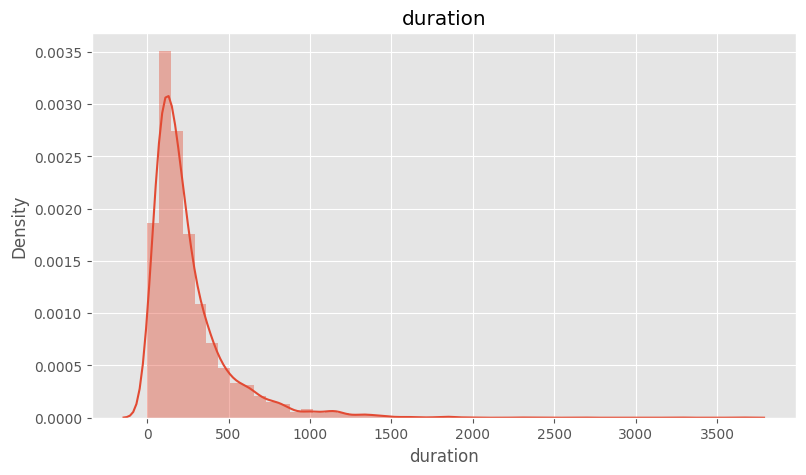

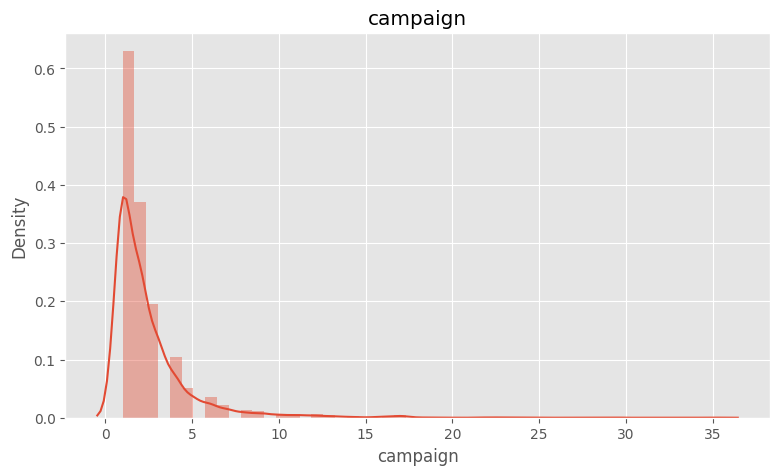

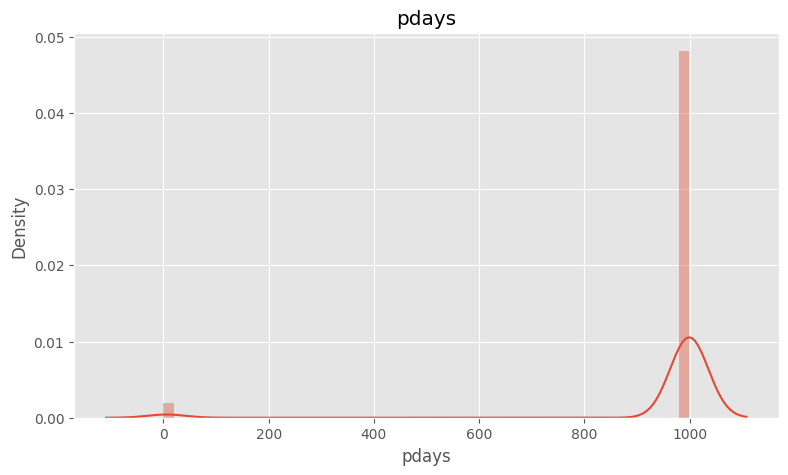

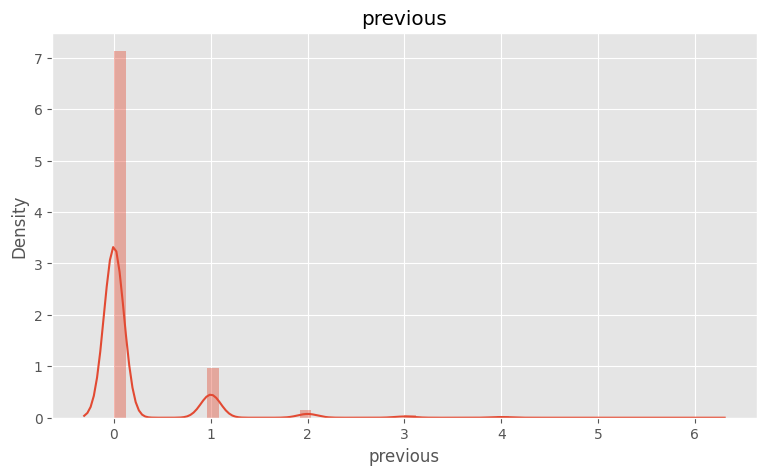

In [ ]:
for column in numeric_col:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df[column])
  plt.title(column)

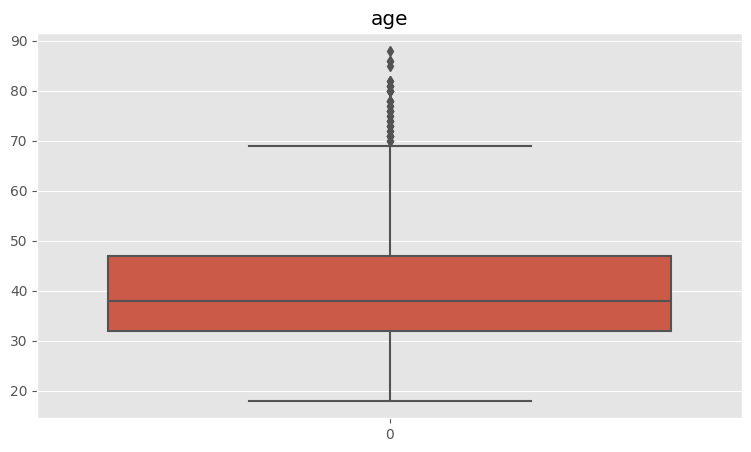

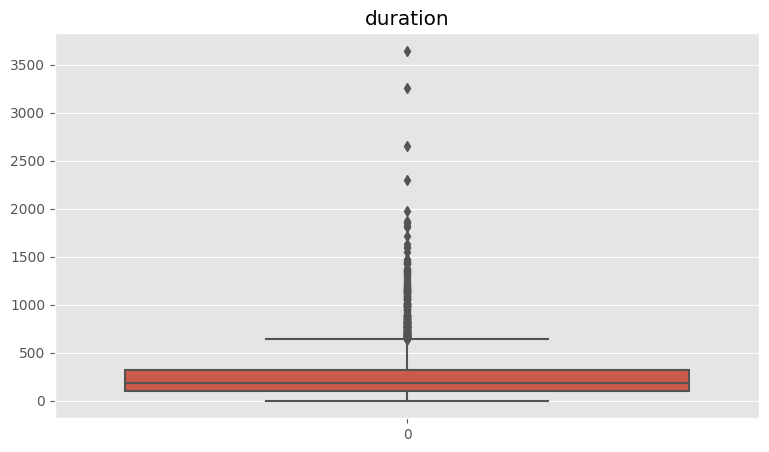

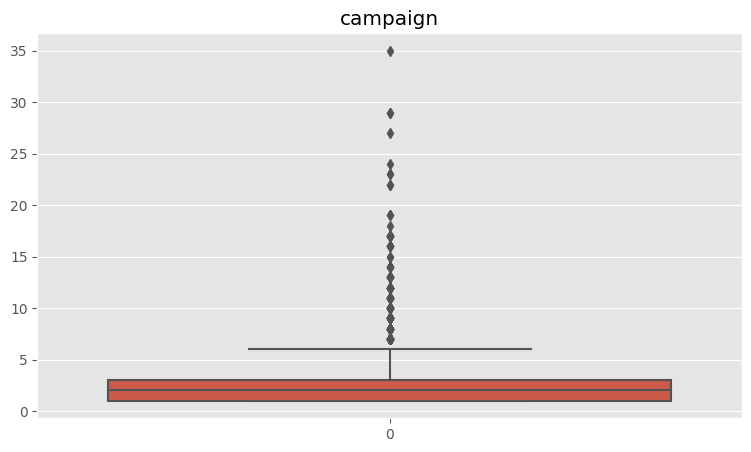

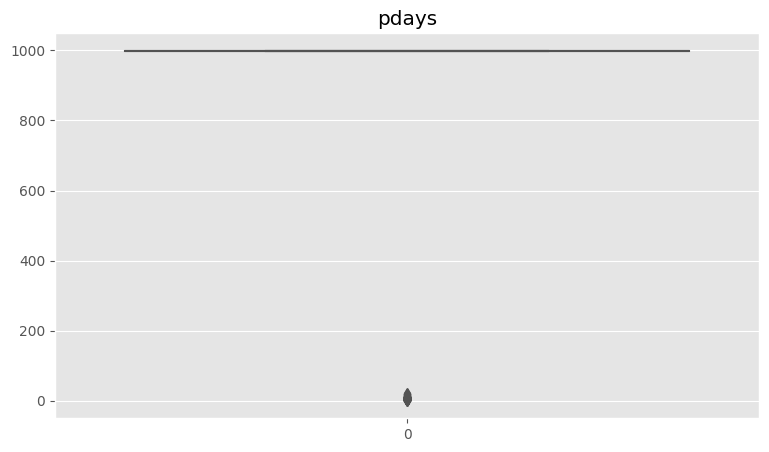

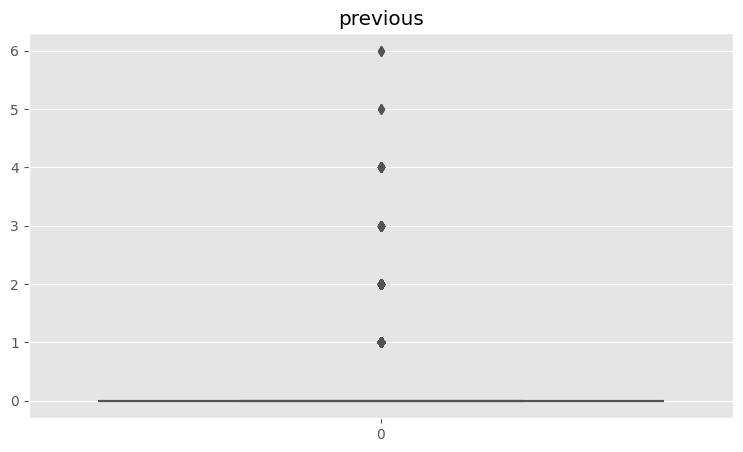

In [ ]:
#Looking for outliers
for column in numeric_col:
  plt.figure(figsize=(20,5))
  plt.subplot(122)
  sns.boxplot(df[column])
  plt.title(column)

### **Observation :**

As we can see from the histogram, the features age, duration and campaign are heavily skewed and this is due to the presence of outliers as seen in the boxplot for these features. We will deal with these outliers in the steps below.
Looking at the plot for pdays, we can infer that majority of the customers were being contacted for the first time because as per the feature description for pdays the value 999 indicates that the customer had not been contacted previously.

Since the features pdays and previous consist majorly only of a single value, their variance is quite less and hence we can drop them since technically will be of no help in prediction.

In [ ]:
#Dropping the columns pdays & previous
df.drop(['pdays','previous'],1, inplace=True)

### **Bivariate Analysis of Categorical Features**

In the code below, we plot every categorical feature against the target by plotting a barchart.

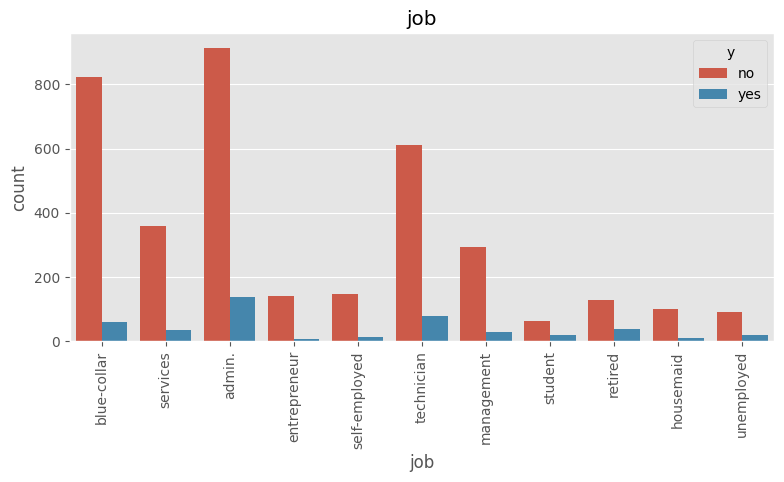

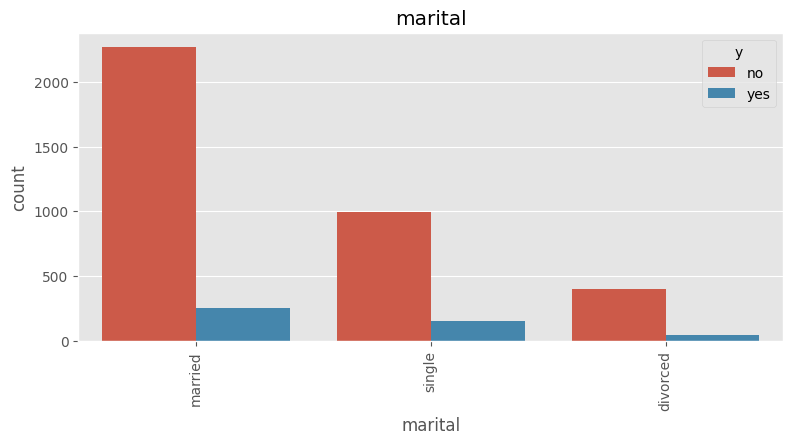

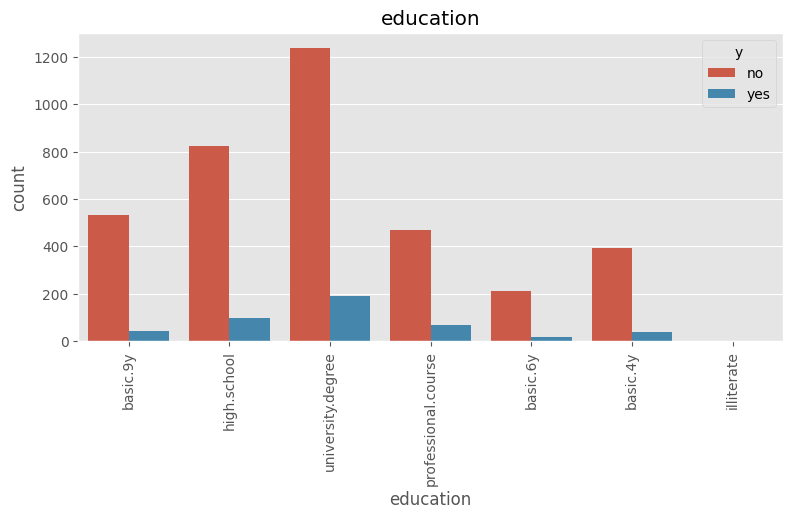

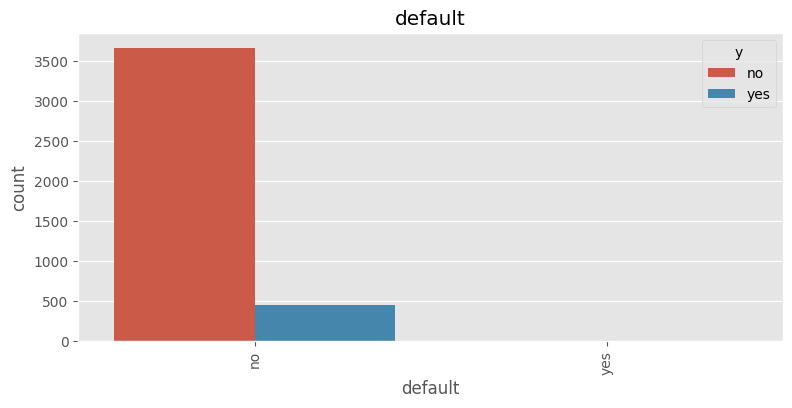

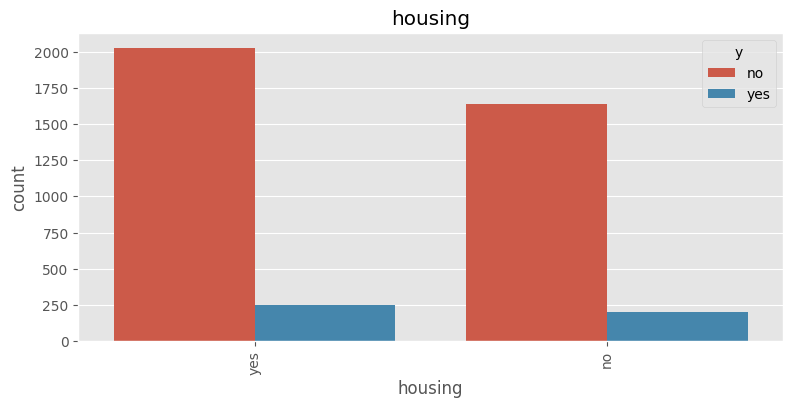

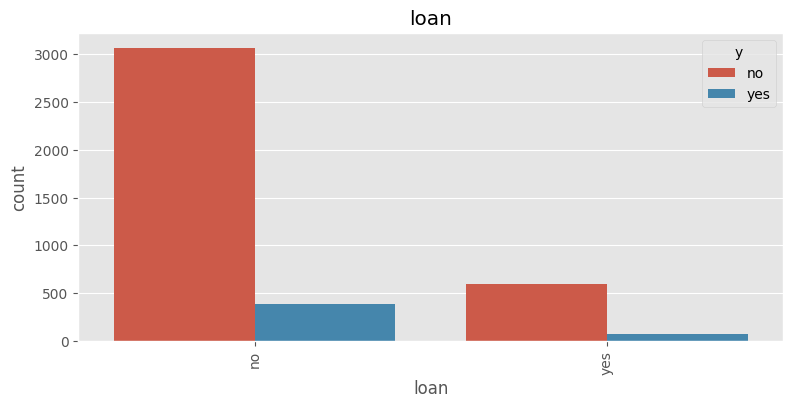

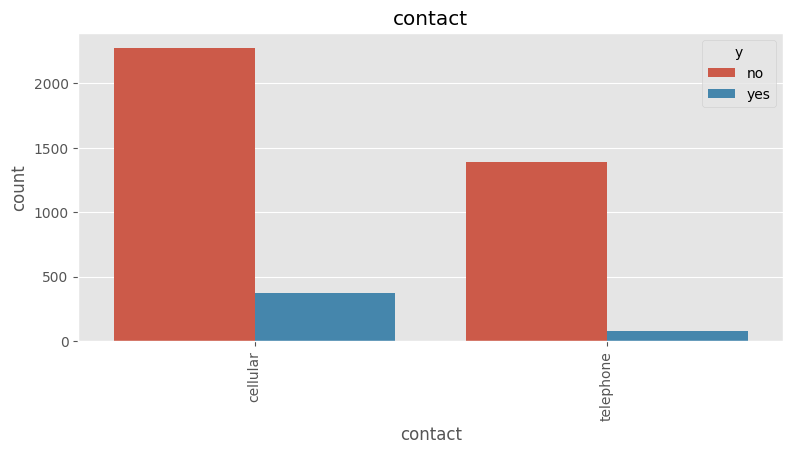

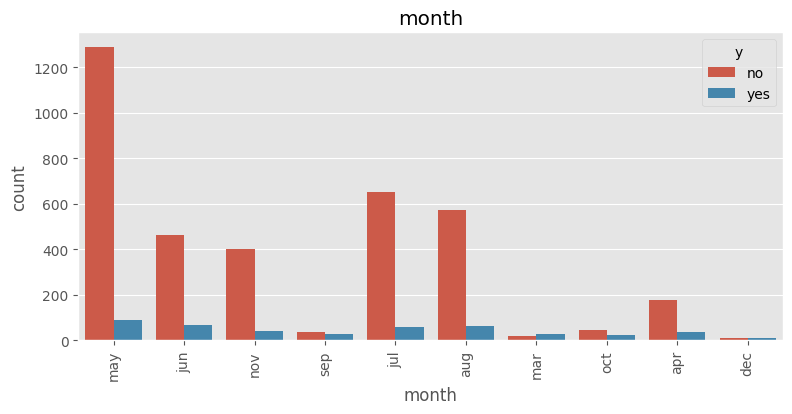

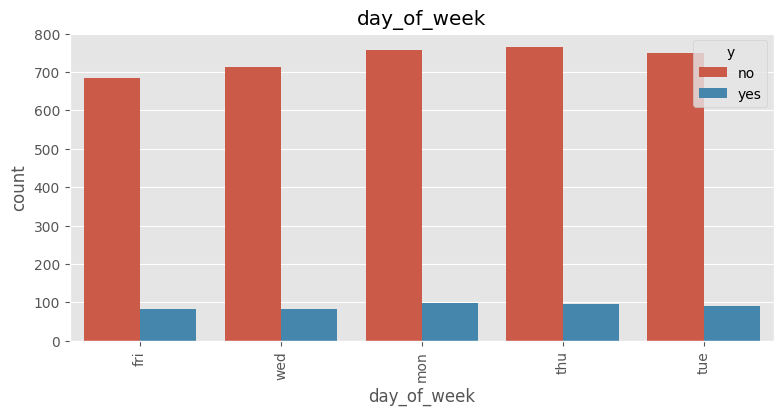

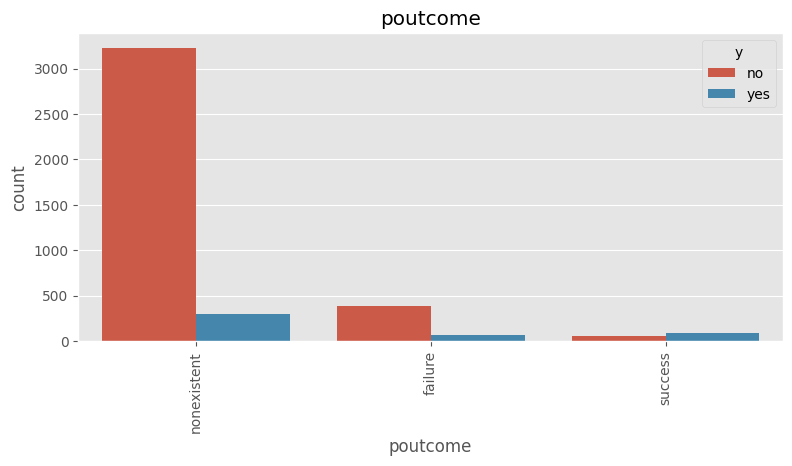

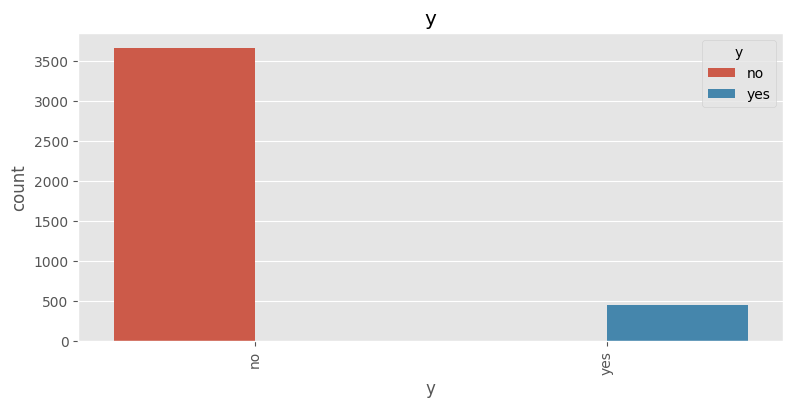

In [ ]:
for column in categorical_col:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  sns.countplot(x=df[column], hue=df["y"],data=df)
  plt.title(column)
  plt.xticks(rotation=90)

### **Observations:**
The common traits seen for customers who have subscribed for the term deposit are :

1) Customers having administrative jobs form the majority amongst those who have subscribed to the term deposit with technicians being the second majority.

2) They are married

3) They hold a university degree

4) They do not hold a credit in default

5) Housing loan doesn't seem a priority to check for since an equal number of customers who have and have not subscribed to it seem to have subscribed to the term deposit.

6) Cell-phones should be the preferred mode of contact for contacting customers.

### **Treating Outliers**

But in our data, some of the features have negative values and also the value 0. In such cases, square root transform or logarithmic transformation cannot be used since we cannot take square root of negative values and logarithm of zero is not defined.
Hence for this data we use a method called Winsorization. In this method we define a confidence interval of let's say 90% and then replace all the outliers below the 5th percentile with the value at 5th percentile and all the values above 95th percentile with the value at the 95th percentile. It is pretty useful when there are negative values and zeros in the features which cannot be treated with log transforms or square roots.

In [ ]:
numeric_col=df.select_dtypes(include=np.number).columns
for col in numeric_col:
  df[col]=winsorize(df[col], limits=[0.05,0.1], inclusive=(True, True))

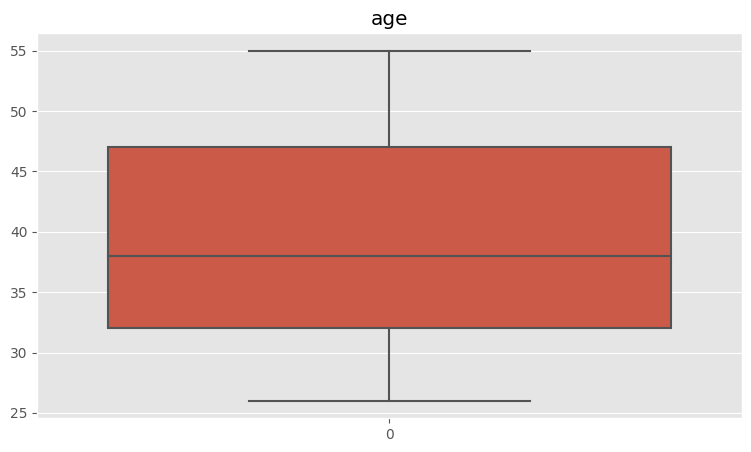

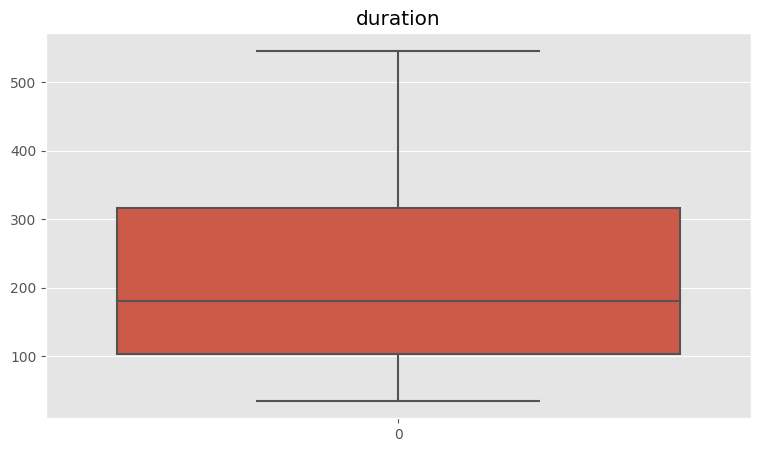

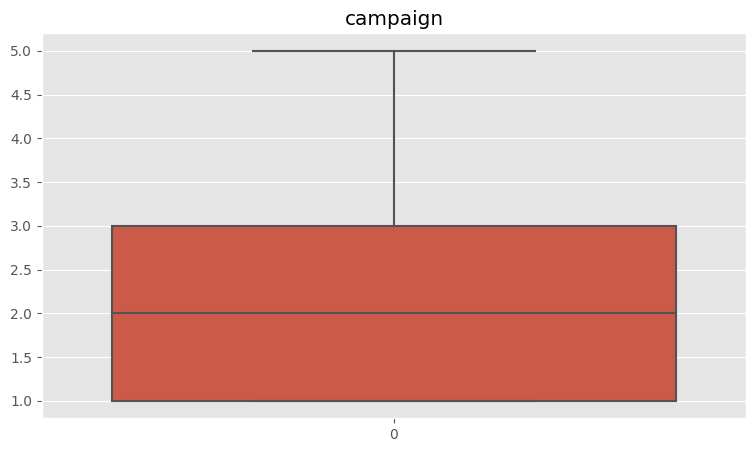

In [ ]:
#Checking for outliers again
for column in numeric_col:
  plt.figure(figsize=(20,5))
  plt.subplot(122)
  sns.boxplot(df[column])
  plt.title(column)

### **Correlation Heatmap**

There does not seem to be a high correlation between features.

Text(0.5, 1.0, 'Correlation Heatmap')

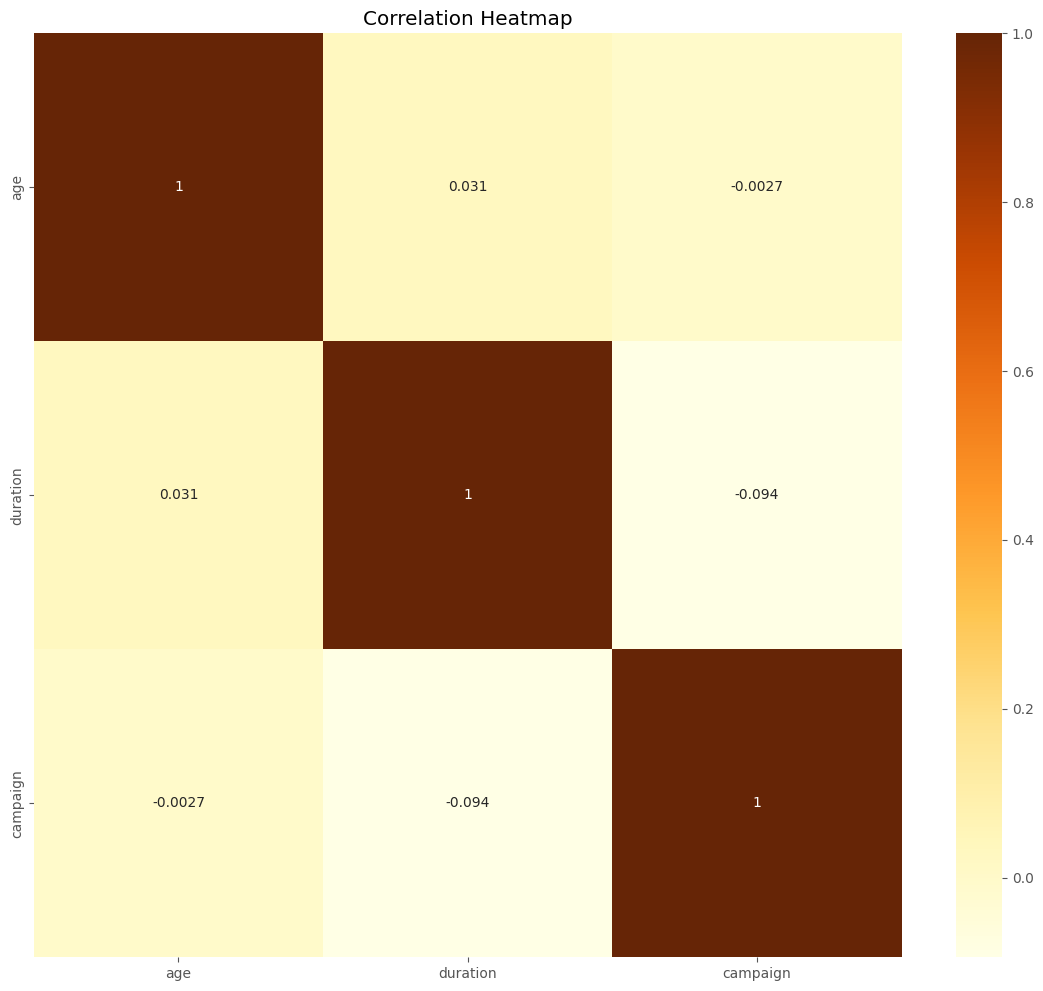

In [ ]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Set figure size
plt.figure(figsize=(14, 12))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr')

# Add labels and title
plt.title('Correlation Heatmap')

# **3. Preprocessing**

### **Encoding of the Categorical Variables**

In [ ]:
# Initializing Label Encoder
le = LabelEncoder()

# Iterating through each of the categorical columns and label encoding them
for feature in categorical_col:
    try:
        df[feature] = le.fit_transform(df[feature])
    except:
        print('Error encoding '+feature)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,30,1,1,2,0,1,0,0,6,0,487,2,1,0
1,39,7,2,3,0,0,0,1,6,0,346,4,1,0
2,26,7,1,3,0,1,0,1,4,4,227,1,1,0
3,38,7,1,2,0,1,0,1,4,0,35,3,1,0
4,47,0,1,6,0,1,0,0,7,1,58,1,1,0


### **Feature Scaling**

In [ ]:
# Split the data into features and labels
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **SMOTE (Synthetic Minority Over-sampling Technique)**

In [ ]:
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Print the shape of the original and resampled data
print('Original data shape:', X_train.shape, y_train.shape)
print('Resampled data shape:', X_train_smote.shape, y_train_smote.shape)


Original data shape: (2883, 13) (2883,)
Resampled data shape: (5134, 13) (5134,)


# **4. Model Selection**

### **Logistic Regression**

In [ ]:
#without SMOTE
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())


[[1078   23]
 [ 106   29]]
90.0


In [ ]:
#with SMOTE
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train_smote,y_train_smote)
logpred = logmodel.predict(X_test)


print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)
LOGCV = (cross_val_score(logmodel, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[873 228]
 [ 27 108]]
79.0


### **K Nearest Neighbors Classifier**


k=1 86.71 (+/- 1.42)
k=2 89.50 (+/- 1.54)
k=3 88.65 (+/- 1.68)
k=4 89.29 (+/- 1.91)
k=5 88.92 (+/- 1.81)
k=6 89.59 (+/- 1.89)
k=7 89.26 (+/- 1.96)
k=8 89.59 (+/- 1.57)
k=9 89.53 (+/- 1.72)
k=10 89.53 (+/- 1.53)
k=11 89.56 (+/- 1.51)
k=12 89.38 (+/- 1.58)
k=13 89.44 (+/- 1.63)
k=14 89.56 (+/- 1.56)
k=15 89.35 (+/- 1.74)
k=16 89.62 (+/- 1.75)
k=17 89.59 (+/- 1.77)
k=18 89.68 (+/- 1.82)
k=19 89.47 (+/- 1.77)
k=20 89.47 (+/- 1.63)
k=21 89.65 (+/- 1.86)
k=22 89.62 (+/- 1.63)
k=23 89.89 (+/- 1.64)
k=24 89.71 (+/- 1.66)
k=25 89.71 (+/- 1.61)
The optimal number of neighbors is 22 with 89.9%


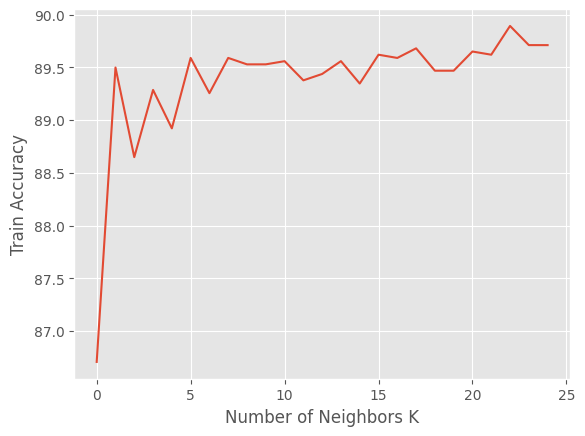

In [ ]:
X_trainK, X_testK, y_trainK, y_testK = train_test_split(df, y, test_size = 0.2, random_state=101, shuffle=True)

#Neighbors
neighbors = np.arange(0,25)

#Create empty list that will hold cv scores
cv_scores = []

#Perform 10-fold cross validation on training set for odd values of k:
for k in neighbors:
    k_value = k+1
    knn = KNeighborsClassifier(n_neighbors = k_value, weights='uniform', p=2, metric='euclidean')
    kfold = model_selection.KFold(n_splits=10, random_state=123, shuffle=True)
    scores = model_selection.cross_val_score(knn, X_trainK, y_trainK, cv=kfold, scoring='accuracy')
    cv_scores.append(scores.mean()*100)
    print("k=%d %0.2f (+/- %0.2f)" % (k_value, scores.mean()*100, scores.std()*100))

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print ("The optimal number of neighbors is %d with %0.1f%%" % (optimal_k, cv_scores[optimal_k]))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)
KNNCV = (cross_val_score(knn, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1097    4]
 [ 125   10]]
90.0


### **Support Vector Machine**

In [ ]:
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, y_train)
svcpred = svc.predict(X_test)
print(confusion_matrix(y_test, svcpred))
print(round(accuracy_score(y_test, svcpred),2)*100)
SVCCV = (cross_val_score(svc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1063   38]
 [ 124   11]]
87.0


### **Decision Tree**

In [ ]:
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1019   82]
 [  77   58]]
87.0


### **Random Forest Classifier**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, y_train)
rfcpred = rfc.predict(X_test)

print(confusion_matrix(y_test, rfcpred ))
print(round(accuracy_score(y_test, rfcpred),2)*100)
RFCCV = (cross_val_score(rfc, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1076   25]
 [  99   36]]
90.0


### **Naive Bayes**

In [ ]:
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[   0 1101]
 [   0  135]]
11.0


In [ ]:
gaussiannb= GaussianNB()
gaussiannb.fit(X_train_smote, y_train_smote)
gaussiannbpred = gaussiannb.predict(X_test)
probs = gaussiannb.predict(X_test)

print(confusion_matrix(y_test, gaussiannbpred ))
print(round(accuracy_score(y_test, gaussiannbpred),2)*100)
GAUSIAN = (cross_val_score(gaussiannb, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[   0 1101]
 [   0  135]]
11.0


### **XG Boost**

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgbprd = xgb.predict(X_test)

print(confusion_matrix(y_test, xgbprd ))
print(round(accuracy_score(y_test, xgbprd),2)*100)
XGB = (cross_val_score(estimator = xgb, X = X_train, y = y_train, cv = 10).mean())

[[1057   44]
 [  86   49]]
89.0


### **Gradient Boosting**

In [ ]:
gbk = GradientBoostingClassifier()
gbk.fit(X_train, y_train)
gbkpred = gbk.predict(X_test)
print(confusion_matrix(y_test, gbkpred ))
print(round(accuracy_score(y_test, gbkpred),2)*100)
GBKCV = (cross_val_score(gbk, X_train, y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())

[[1070   31]
 [  92   43]]
90.0


## **Accuracy**

In [ ]:
models = pd.DataFrame({
                'Models': ['Random Forest Classifier', 'Decision Tree Classifier', 'Support Vector Machine',
                           'K-Near Neighbors', 'Logistic Model', 'Gausian NB', 'XGBoost', 'Gradient Boosting'],
                'Score':  [RFCCV, DTREECV, SVCCV, KNNCV, LOGCV, GAUSIAN, XGB, GBKCV]})

models.sort_values(by='Score', ascending=False)

,Models,Score
7,Gradient Boosting,0.901501
3,K-Near Neighbors,0.895594
0,Random Forest Classifier,0.892831
6,XGBoost,0.890742
4,Logistic Model,0.889017
2,Support Vector Machine,0.881376
1,Decision Tree Classifier,0.868901
5,Gausian NB,0.186425


### **AUC Curves**

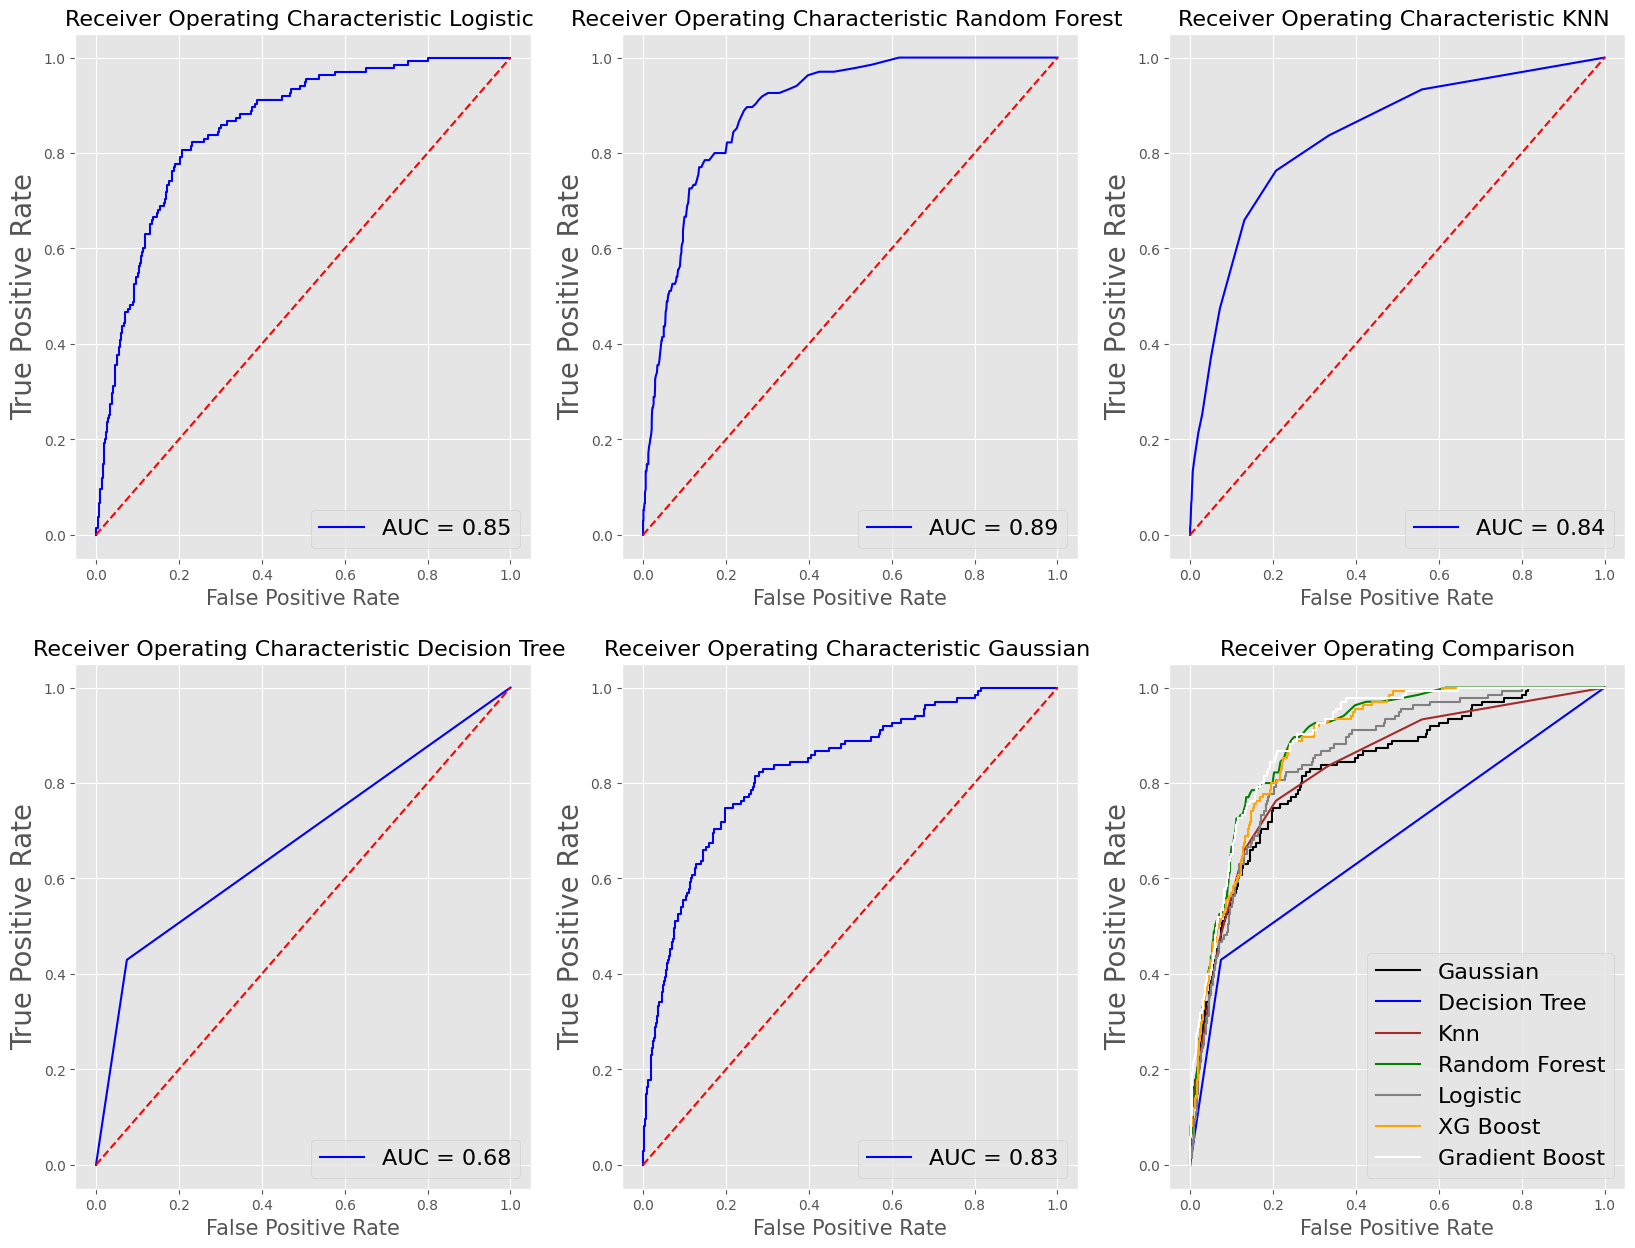

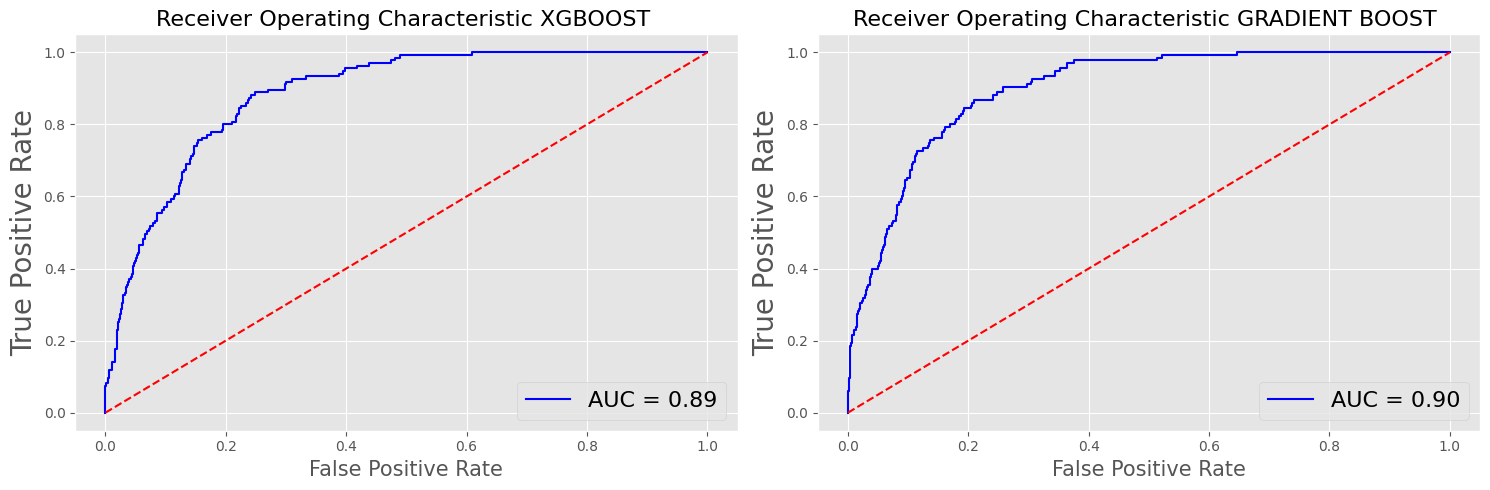

In [ ]:
#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 3, figsize = (20,15))

#LOGMODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=16)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 16})

#RANDOM FOREST --------------------
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)
ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=16)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#KNN----------------------
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(y_test, preds)
roc_aucknn = metrics.auc(fprknn, tprknn)

ax_arr[0,2].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucknn)
ax_arr[0,2].plot([0, 1], [0, 1],'r--')
ax_arr[0,2].set_title('Receiver Operating Characteristic KNN ',fontsize=16)
ax_arr[0,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,2].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = dtree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)
ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=16)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#GAUSSIAN ---------------------
probs = gaussiannb.predict_proba(X_test)
preds = probs[:,1]
fprgau, tprgau, thresholdgau = metrics.roc_curve(y_test, preds)
roc_aucgau = metrics.auc(fprgau, tprgau)
ax_arr[1,1].plot(fprgau, tprgau, 'b', label = 'AUC = %0.2f' % roc_aucgau)
ax_arr[1,1].plot([0, 1], [0, 1],'r--')
ax_arr[1,1].set_title('Receiver Operating Characteristic Gaussian ',fontsize=16)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

# XGBOOST ---------------------
fig, (ax, ax1) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fprxgb, tprxgb, thresholdxgb = metrics.roc_curve(y_test, preds)
roc_aucxgb = metrics.auc(fprxgb, tprxgb)
ax.plot(fprxgb, tprxgb, 'b', label = 'AUC = %0.2f' % roc_aucxgb)
ax.plot([0, 1], [0, 1],'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST ',fontsize=16)
ax.set_ylabel('True Positive Rate',fontsize=20)
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.legend(loc = 'lower right', prop={'size': 16})

#Gradient ---------------------
probs = gbk.predict_proba(X_test)
preds = probs[:,1]
fprgbk, tprgbk, thresholdgbk = metrics.roc_curve(y_test, preds)
roc_aucgbk = metrics.auc(fprgbk, tprgbk)
ax1.plot(fprgbk, tprgbk, 'b', label = 'AUC = %0.2f' % roc_aucgbk)
ax1.plot([0, 1], [0, 1],'r--')
ax1.set_title('Receiver Operating Characteristic GRADIENT BOOST ',fontsize=16)
ax1.set_ylabel('True Positive Rate',fontsize=20)
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=1)

#ALL PLOTS ----------------------------------
ax_arr[1,2].plot(fprgau, tprgau, 'b', label = 'Gaussian', color='black')
ax_arr[1,2].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,2].plot(fprknn, tprknn, 'b', label = 'Knn', color='brown')
ax_arr[1,2].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,2].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,2].plot(fprxgb, tprxgb, 'b', label = 'XG Boost', color='orange')
ax_arr[1,2].plot(fprgbk, tprgbk, 'b', label = 'Gradient Boost', color='white')
ax_arr[1,2].set_title('Receiver Operating Comparison',fontsize=16)
ax_arr[1,2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,2].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout()


Our best model seems to be Gradient Boosting in terms of AUC curves and the accuracy levels.

## **Other Metrics to Consider**

In [ ]:
models = ['log','knn', 'svc', 'dtree', 'rfc', 'nb', 'xgb', 'gbk']
predictions = [logpred, knnpred, svcpred, dtreepred, rfcpred, gaussiannbpred, xgbprd, gbkpred]
y_true = y_test  # Assuming y_test contains the true labels

for model, pred in zip(models, predictions):
    accuracy = accuracy_score(y_true, pred)
    precision = precision_score(y_true, pred)
    recall = recall_score(y_true, pred)
    f1 = f1_score(y_true, pred)

    print(f"Performance metrics for {model}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print()


Performance metrics for log:
Accuracy: 0.7937
Precision: 0.3214
Recall: 0.8000
F1-Score: 0.4586

Performance metrics for knn:
Accuracy: 0.8956
Precision: 0.7143
Recall: 0.0741
F1-Score: 0.1342

Performance metrics for svc:
Accuracy: 0.8689
Precision: 0.2245
Recall: 0.0815
F1-Score: 0.1196

Performance metrics for dtree:
Accuracy: 0.8714
Precision: 0.4143
Recall: 0.4296
F1-Score: 0.4218

Performance metrics for rfc:
Accuracy: 0.8997
Precision: 0.5902
Recall: 0.2667
F1-Score: 0.3673

Performance metrics for nb:
Accuracy: 0.1092
Precision: 0.1092
Recall: 1.0000
F1-Score: 0.1969

Performance metrics for xgb:
Accuracy: 0.8948
Precision: 0.5269
Recall: 0.3630
F1-Score: 0.4298

Performance metrics for gbk:
Accuracy: 0.9005
Precision: 0.5811
Recall: 0.3185
F1-Score: 0.4115



Based on these metrics:
 - If accuracy is the most important factor, then Gradient Boosting (gbk) has the highest accuracy of 0.9005.
 - However, if a balance between precision and recall is desired, then K-Nearest Neighbors (knn) may be a good choice with the highest precision (0.8956) and a moderate level of recall (0.0741).
 - I think that a balanced model would work the best as we would not want to make a lot of mistakes in our predictions. Therefore I choose the **KNN Model**.

## **Hyperparameter Tuning**

In [ ]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters and their ranges to search
param_grid = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}

# Create the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=kfold, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the corresponding best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best hyperparameters and the corresponding best score
print("Best Hyperparameters: ", best_params)
print("Best Score: ", best_score)

Best Hyperparameters:  {'n_neighbors': 10, 'weights': 'uniform'}
Best Score:  0.8990664648212225


## **Model Optimization**

In [ ]:
# Define the KNN classifier with the best hyperparameters
knn_optimized = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'])

# Fit the optimized model on the training data
fit_model=knn_optimized.fit(X_train, y_train)

In [ ]:
# Predict the target variable for the test set
y_pred = knn_optimized.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.9004854368932039
Precision: 0.75
Recall: 0.13333333333333333
F1 Score: 0.22641509433962267


## **Model Evaluation**

In [ ]:
# Evaluate the trained model on the testing/validation set
y_pred = grid_search.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-Score: {:.4f}".format(f1))


Accuracy: 0.9005
Precision: 0.7500
Recall: 0.1333
F1-Score: 0.2264


# **Pipeline**

In [ ]:
# Split the data into features and labels
X = df.drop('y', axis=1)
y = df['y']

# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Custom transformer to apply LabelEncoder to each column separately
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.label_encoders = {}

    def fit(self, X, y=None):
        if self.columns is None:
            self.columns = X.columns
        for column in self.columns:
            le = LabelEncoder()
            le.fit(X[column])
            self.label_encoders[column] = le
        return self

    def transform(self, X):
        X = X.copy()
        for column, le in self.label_encoders.items():
            X[column] = le.transform(X[column])
        return X

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

# Define the categorical features for label encoding
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', MultiColumnLabelEncoder(columns=categorical_features), categorical_features)
    ])

# Define the pipeline with StandardScaler and KNN Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8972491909385113


# **Deployment**

In [ ]:
# Save the model to a file
with open('model2.pkl', 'wb') as file:
    pickle.dump(fit_model, file)

In [ ]:
# Load the deployed model from the file
with open('model2.pkl', 'rb') as file:
    model = pickle.load(file)